# Project Students Marks

In [1]:
import mysql.connector

In [2]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Karan@1106",
    database="mysql")

In [3]:
df=pd.read_sql_query("Select * from Stud_marks",con)
df
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,History,Civics
0,John,M,None,55,45,56,87,21,52,89
1,Suresh,M,None,75,96,78,64,90,61,58
2,Ramesh,M,None,25,54,89,76,95,87,56
3,Jessica,F,None,78,96,86,63,54,89,75
4,Jennifer,F,None,58,96,78,46,96,77,83


In [4]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore

In [6]:
df.isnull().sum()

Name          0
Gender        0
DOB          10
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
History       0
Civics        0
dtype: int64

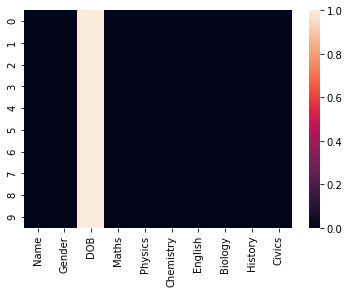

In [7]:
sns.heatmap(df.isnull())

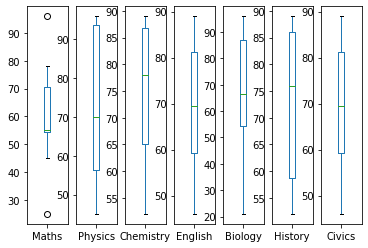

In [8]:
df.plot(kind="box",subplots=True)
lt.show()

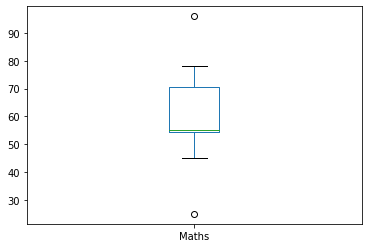

In [9]:
df["Maths"].plot.box()

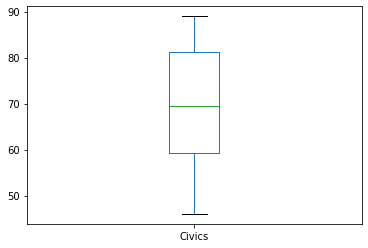

In [10]:
df["Civics"].plot.box()

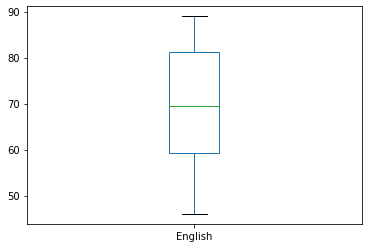

In [11]:
df["English"].plot.box()

In [12]:
df=df.drop(["DOB"],axis=1)

In [13]:
df.isnull().sum()

Name         0
Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
History      0
Civics       0
dtype: int64

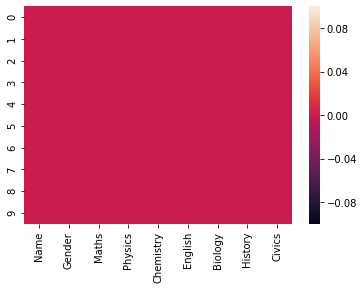

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.corr()

,Maths,Physics,Chemistry,English,Biology,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131
History,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953
Civics,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000


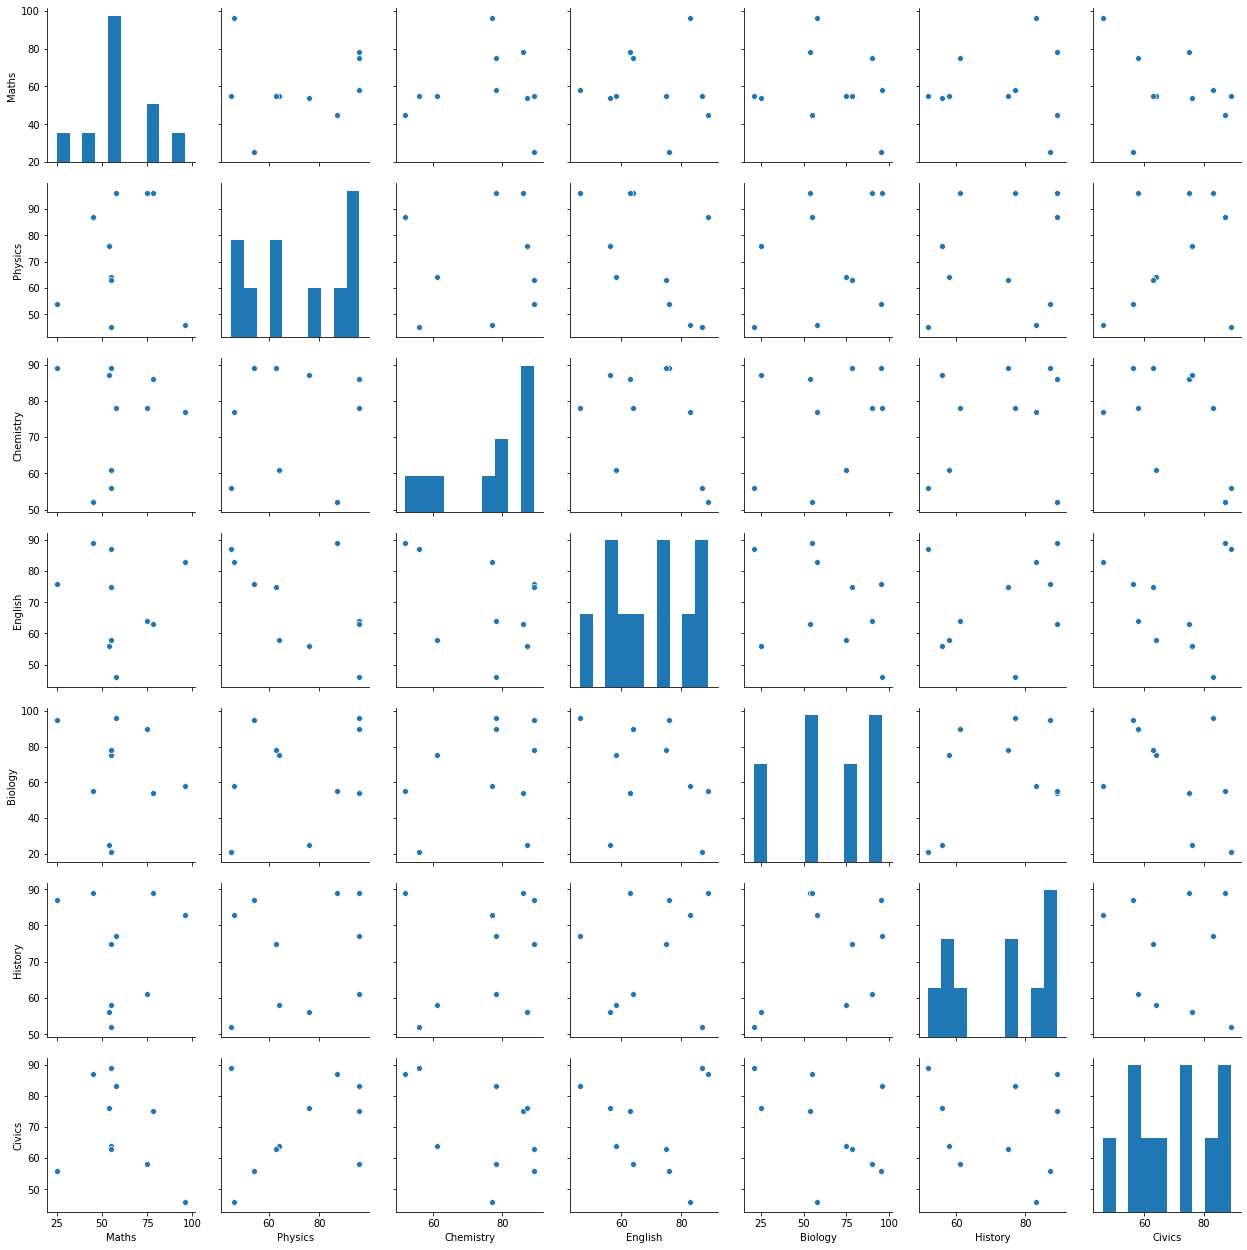

In [16]:
sns.pairplot(df)

# Project Titanic Train

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [45]:
data=pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

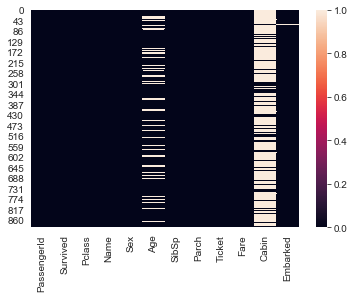

In [48]:
sns.heatmap(data.isnull())

In [49]:
mean_age=data["Age"].mean()
mean_age

29.69911764705882

In [50]:
data["Age"]=data["Age"].fillna(value=mean_age)
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [51]:
data=data.drop(["Cabin"],axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [52]:
data_mode=data["Embarked"].mode()
data_mode

0    S
dtype: object

In [53]:
data["Embarked"]=data["Embarked"].fillna(value="S")
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [54]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

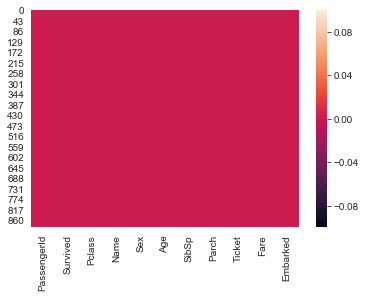

In [55]:
sns.heatmap(data.isnull())

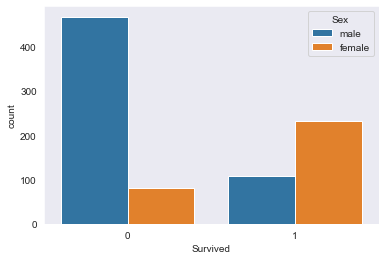

In [56]:
sns.set_style
sns.countplot(x="Survived",hue="Sex",data=data)

In [57]:
#coverting categorical features
pd.get_dummies(data["Embarked"],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [58]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
embark=pd.get_dummies(data["Embarked"],drop_first=True)

In [60]:
data.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [61]:
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [62]:
data=pd.concat([data,sex,embark],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
data.drop("Survived",axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [64]:
data["Survived"].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [184]:
x_train,x_test,y_train,y_test=train_test_split(data.drop("Survived",axis=1),data["Survived"],test_size=0.21,random_state=11)

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lg=LogisticRegression()


In [187]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
lg.intercept_

array([3.56333957])

In [189]:
lg.coef_

array([[ 2.25833093e-04, -8.33693096e-01, -2.24155575e-02,
        -2.52922329e-01, -5.61365949e-02,  3.31089995e-03,
        -2.33956645e+00,  1.05844944e-01, -1.24917601e-01]])

In [190]:
lg.score(x_train,y_train)

0.786628733997155

In [191]:
predictions=lg.predict(x_test)

In [192]:
from sklearn.metrics import confusion_matrix

In [193]:
accuracy=confusion_matrix(y_test,predictions)

In [194]:
accuracy


array([[113,  13],
       [ 16,  46]], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score

In [196]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8457446808510638